In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\asus\AppData\Local\Temp\ipykernel_24192\947282433.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
country_names = [
    'United States',
    'India',
    'Russia',
    'Germany',
    'United Kingdom',
    'France',
    'Japan',
    'Brazil',
    'Italy'
]

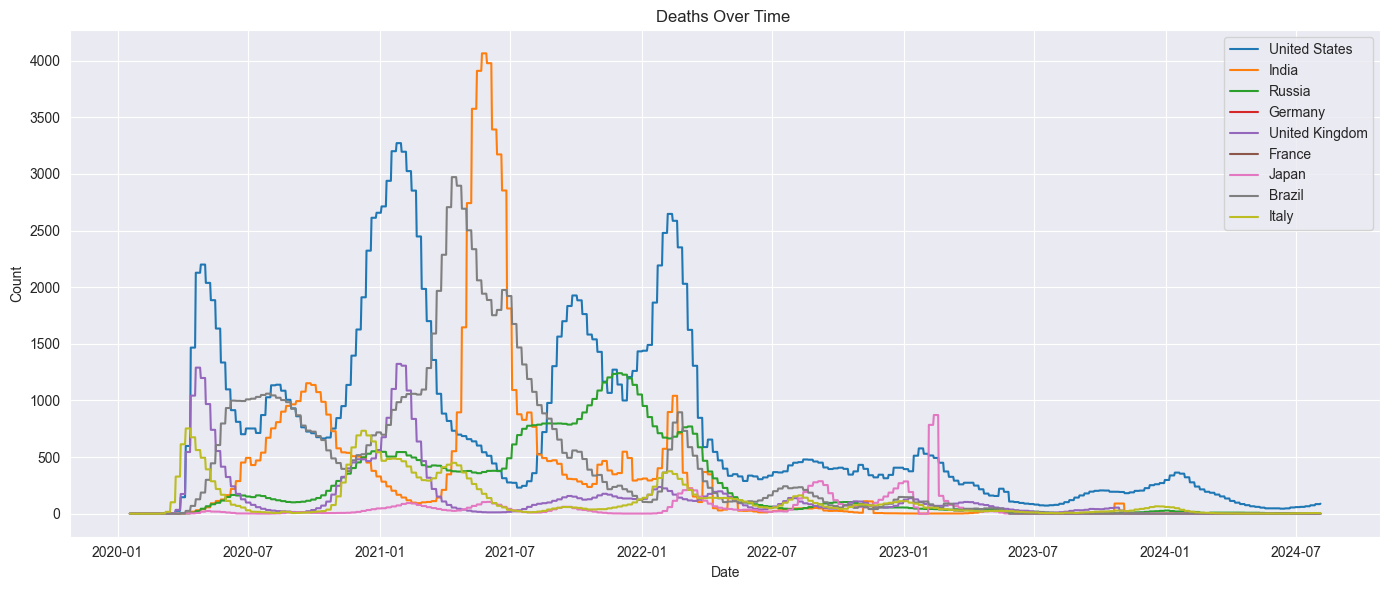

In [5]:
plt.figure(figsize=(14, 6))

for country in country_names:
    df_country = df[df['country'] == country].copy()
    df_country['rolling_deaths'] = df_country['new_deaths'].rolling(window=14).mean()
    plt.plot(df_country['date'], df_country['rolling_deaths'], label=country)

plt.title(f'Deaths Over Time ')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


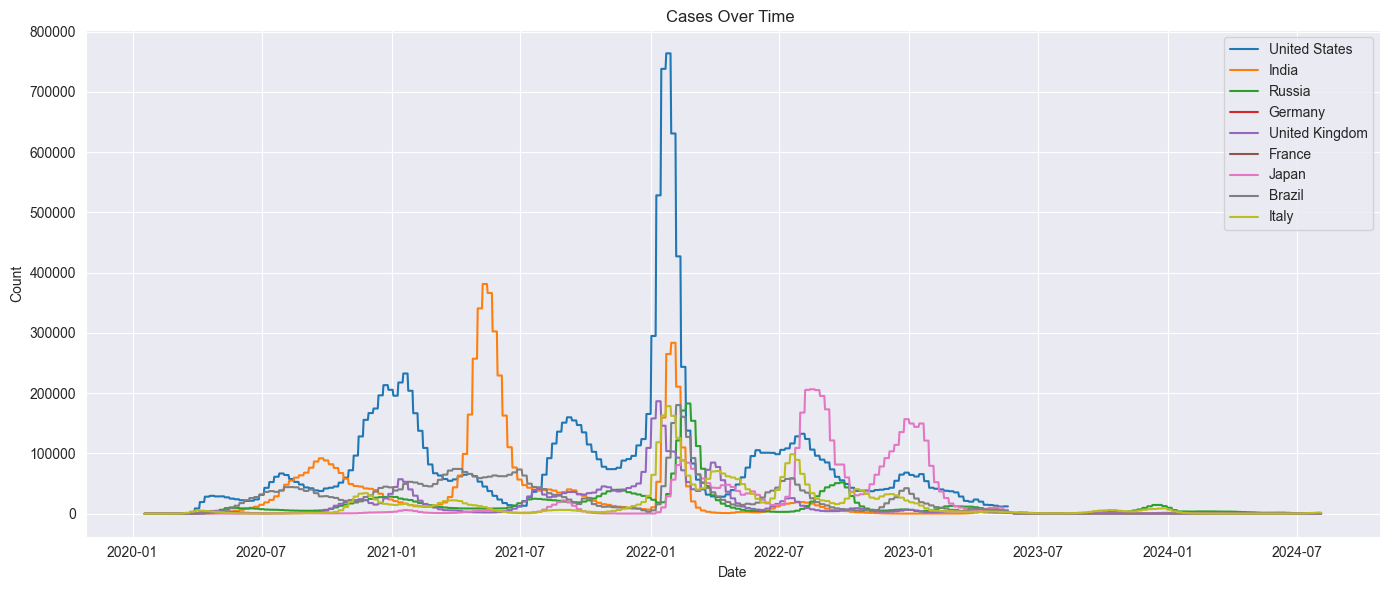

In [6]:
plt.figure(figsize=(14, 6))

for country in country_names:
    df_country = df[df['country'] == country].copy()
    df_country['rolling_deaths'] = df_country['new_cases'].rolling(window=14).mean()
    plt.plot(df_country['date'], df_country['rolling_deaths'], label=country)

plt.title(f'Cases Over Time ')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# شناسایی پیک‌های کرونا

In [8]:
df['new_cases_smoothed'] = df['new_cases'].rolling(window=7, min_periods=1).mean()


# پیدا کردن پیک (بیشترین مقدار):

In [9]:
peak_date = df.loc[df['new_cases_smoothed'].idxmax(), 'date']
peak_value = df['new_cases_smoothed'].max()
print(f"📌 Peak on {peak_date} with {peak_value:.0f} new cases")

📌 Peak on 2022-12-25 00:00:00 with 5782211 new cases


In [10]:
df.groupby('country')["new_cases"].mean()

country
Afghanistan           140.510155
Albania               200.147551
Algeria               162.568100
American Samoa          4.993429
Andorra                28.682796
                        ...     
Vietnam              6943.847073
Wallis and Futuna       2.246117
Yemen                   7.135603
Zambia                208.985663
Zimbabwe              159.227137
Name: new_cases, Length: 231, dtype: float64

In [11]:
df.groupby('country')["new_deaths"].max()

country
Afghanistan           595.0
Albania               141.0
Algeria               266.0
American Samoa          7.0
Andorra                11.0
                      ...  
Vietnam              2503.0
Wallis and Futuna       7.0
Yemen                 100.0
Zambia                430.0
Zimbabwe              482.0
Name: new_deaths, Length: 231, dtype: float64